In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import os
import shutil
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [ ]:


def extract_all(archives, extract_path):
    for filename in archives:
        shutil.unpack_archive(filename, extract_path)

In [25]:

root_dir = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
data_folder = os.path.join(root_dir, "data")
carparking_dataset_path = os.path.join(root_dir, "data","PKLot.tar.gz")

In [11]:
# unpack dataset
shutil.unpack_archive(carparking_dataset_path, data_folder)

In [4]:
path_to_data="C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented"
path_to_data_occupied=os.path.join(path_to_data,"Occupied")
path_to_data_empty=os.path.join(path_to_data,"Empty")

In [29]:
# fix folder structure 

for subfolder in os.listdir(path_to_data):
    if subfolder not in ["Occupied", "Empty"]:
        subfolderOccupied = os.path.join(path_to_data, subfolder, "Occupied")
        subfolderEmpty = os.path.join(path_to_data, subfolder, "Empty")
        if os.path.isdir(subfolderOccupied):
            for Occupiedfile in os.listdir(subfolderOccupied):
                shutil.move(os.path.join(subfolderOccupied, Occupiedfile), os.path.join(path_to_data_occupied,Occupiedfile))
        if os.path.isdir(subfolderEmpty):
            for Emptyfile in os.listdir(subfolderEmpty):
                shutil.move(os.path.join(subfolderEmpty, Emptyfile), os.path.join(path_to_data_empty,Emptyfile))
            


In [26]:
# setting system settings 
bs = 16 # batch size
path_img = Path(path_to_data)
path_img

WindowsPath('C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented/test')

In [6]:
collate_fn = torch.utils.data.dataloader.default_collate

In [9]:
from torchvision import transforms

tfms = get_transforms(do_flip=False)

In [12]:
data = ImageDataBunch.from_folder(path_img, ds_tfms=tfms, size=299, bs=bs, valid_pct=0.2).normalize(imagenet_stats)


In [13]:
print()
print(data.classes)
len(data.classes),data.c


['Empty', 'Occupied']


(2, 2)

In [14]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [15]:
#learn.model

In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.021614,0.024555,0.001178,1:48:48


In [17]:
learn.save('stage-1')

In [18]:
# Results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

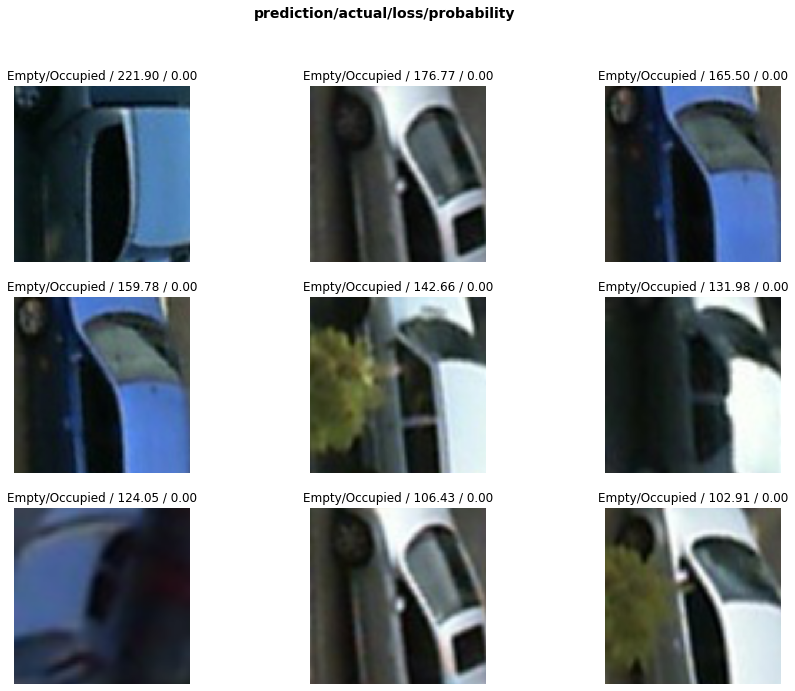

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [20]:
interp.most_confused(min_val=2)

[('Occupied', 'Empty', 107), ('Empty', 'Occupied', 57)]

In [44]:
# export model to prod
from torchvision import transforms

tfms = get_transforms(do_flip=False)
path_to_data="C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented"
path_img = Path(path_to_data)
data = ImageDataBunch.from_folder(path_img, ds_tfms=tfms, size=299, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn = learn.load('stage-1')
learn.export()



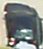

In [41]:
path = Path("C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/PKLotSegmented")
learn = load_learner(path)
test_img = "C:/Users/sheec/Desktop/Projects/govhack2019/data/PKLot/test/2012-09-11_15_16_58#042.jpg"
img = open_image(test_img)
img

In [43]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Occupied